# Project Name: Amazon Products Sentiment Analysis

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import nltk.classify.util
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.metrics import roc_curve, auc
from nltk.classify import NaiveBayesClassifier
import numpy as np
import re
import string
import nltk
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv(r'D:\dataset\Amazon Sentiment Analysis Data set\Kindle Dataset.csv')
df.head()

,id,name,asins,brand,categories,keys,manufacturer,reviews.date,reviews.dateAdded,reviews.dateSeen,...,reviews.doRecommend,reviews.id,reviews.numHelpful,reviews.rating,reviews.sourceURLs,reviews.text,reviews.title,reviews.userCity,reviews.userProvince,reviews.username
0,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-13T00:00:00.000Z,2017-07-03T23:33:15Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z",...,True,NaN,0.0,5.0,http://reviews.bestbuy.com/3545/5620406/review...,This product so far has not disappointed. My c...,Kindle,NaN,NaN,Adapter
1,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-13T00:00:00.000Z,2017-07-03T23:33:15Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z",...,True,NaN,0.0,5.0,http://reviews.bestbuy.com/3545/5620406/review...,great for beginner or experienced person. Boug...,very fast,NaN,NaN,truman
2,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-13T00:00:00.000Z,2017-07-03T23:33:15Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z",...,True,NaN,0.0,5.0,http://reviews.bestbuy.com/3545/5620406/review...,Inexpensive tablet for him to use and learn on...,Beginner tablet for our 9 year old son.,NaN,NaN,DaveZ
3,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-13T00:00:00.000Z,2017-07-03T23:33:15Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z",...,True,NaN,0.0,4.0,http://reviews.bestbuy.com/3545/5620406/review...,I've had my Fire HD 8 two weeks now and I love...,Good!!!,NaN,NaN,Shacks
4,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-12T00:00:00.000Z,2017-07-03T23:33:15Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z",...,True,NaN,0.0,5.0,http://reviews.bestbuy.com/3545/5620406/review...,I bought this for my grand daughter when she c...,Fantastic Tablet for kids,NaN,NaN,explore42


In [3]:
firm = df[['reviews.rating','reviews.text','reviews.title','reviews.username']]
print(firm.isnull().sum())

reviews.rating      33
reviews.text         1
reviews.title        5
reviews.username     2
dtype: int64


In [4]:
firm.head()

,reviews.rating,reviews.text,reviews.title,reviews.username
0,5.0,This product so far has not disappointed. My c...,Kindle,Adapter
1,5.0,great for beginner or experienced person. Boug...,very fast,truman
2,5.0,Inexpensive tablet for him to use and learn on...,Beginner tablet for our 9 year old son.,DaveZ
3,4.0,I've had my Fire HD 8 two weeks now and I love...,Good!!!,Shacks
4,5.0,I bought this for my grand daughter when she c...,Fantastic Tablet for kids,explore42


## Checking the null values

In [5]:
check =firm[firm['reviews.rating'].isnull()]
check.head()

,reviews.rating,reviews.text,reviews.title,reviews.username
2886,NaN,The Kindle is my first e-ink reader. I own an ...,"Worth the money. Not perfect, but very very go...",Jeffrey Stanley
2887,NaN,"I'm a first-time Kindle owner, so I have nothi...","I Wanted a Dedicated E-Reader, and That's What...",Matthew Coenen
2888,NaN,UPDATE NOVEMBER 2011:My review is now over a y...,Kindle vs. Nook (updated),Ron Cronovich
2889,NaN,"I'm a first-time Kindle owner, so I have nothi...","I Wanted a Dedicated E-Reader, and That's What...",Matthew Coenen
2890,NaN,I woke up to a nice surprise this morning: a n...,"Not the perfect do-it-all device, but very clo...",C. Tipton


## checking not null values

In [6]:
senti = firm[firm['reviews.rating'].notnull()]
firm.head()

,reviews.rating,reviews.text,reviews.title,reviews.username
0,5.0,This product so far has not disappointed. My c...,Kindle,Adapter
1,5.0,great for beginner or experienced person. Boug...,very fast,truman
2,5.0,Inexpensive tablet for him to use and learn on...,Beginner tablet for our 9 year old son.,DaveZ
3,4.0,I've had my Fire HD 8 two weeks now and I love...,Good!!!,Shacks
4,5.0,I bought this for my grand daughter when she c...,Fantastic Tablet for kids,explore42


## Classifying the positive text and negative text

In [7]:
senti['senti'] = senti['reviews.rating']>=4
senti['senti'] = senti['senti'].replace([True,False],['pos','neg'])

In [8]:
senti.head()

,reviews.rating,reviews.text,reviews.title,reviews.username,senti
0,5.0,This product so far has not disappointed. My c...,Kindle,Adapter,pos
1,5.0,great for beginner or experienced person. Boug...,very fast,truman,pos
2,5.0,Inexpensive tablet for him to use and learn on...,Beginner tablet for our 9 year old son.,DaveZ,pos
3,4.0,I've had my Fire HD 8 two weeks now and I love...,Good!!!,Shacks,pos
4,5.0,I bought this for my grand daughter when she c...,Fantastic Tablet for kids,explore42,pos


## Count of Reviews

In [9]:
senti['senti'].value_counts()

pos    32316
neg     2311
Name: senti, dtype: int64

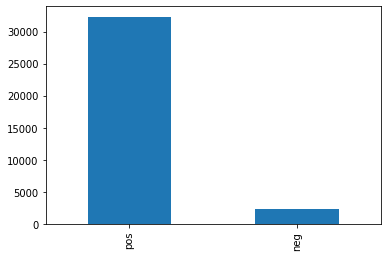

In [10]:
senti['senti'].value_counts().plot.bar()

## Cleaning text

In [11]:
import nltk
import nltk.classify.util
from nltk.classify import NaiveBayesClassifier
import re
import string

In [12]:
clean_re = re.compile('[^a-z]+')

def cleansen(sentence):
    sentence = str(sentence)
    sentence = sentence.lower()
    sentence = clean_re.sub(' ', sentence).strip()
    return sentence

senti['summary_clean'] = senti['reviews.text'].apply(cleansen)
check['summary_clean'] =  check['reviews.text'].apply(cleansen)

In [13]:
## Splitting Train and test Data

split = senti[['summary_clean', 'senti']]
train = split.sample(frac=0.8,random_state = 200)
test = split.drop(train.index)

## Feature Extractor

In [14]:
def word_fests(words):
    features = {}
    for word in words:
        features[word] = True
    return features
    

In [15]:
train['words'] = train['summary_clean'].str.lower().str.split()
test['words'] = test['summary_clean'].str.lower().str.split()
check['words'] = check['summary_clean'].str.lower().str.split()


train.index = range(train.shape[0])
test.index = range(test.shape[0])
check.index = range(check.shape[0])
prediction = {}


train_naive = []
test_naive = []
check_naive = []



for i in range(train.shape[0]):
    train_naive = train_naive +[[word_fests(train["words"][i]) , train["senti"][i]]]
for i in range(test.shape[0]):
    test_naive = test_naive +[[word_fests(test["words"][i]) , test["senti"][i]]]
for i in range(check.shape[0]):
    check_naive = check_naive +[word_fests(check["words"][i])]


classifier = NaiveBayesClassifier.train(train_naive)
print("NLTK Naive bayes Accuracy : {}".format(nltk.classify.util.accuracy(classifier , test_naive)))
classifier.show_most_informative_features(5)


NLTK Naive bayes Accuracy : 0.5897472924187726
Most Informative Features
                 warning = True              neg : pos    =     51.3 : 1.0
                 deleted = True              neg : pos    =     51.3 : 1.0
                  rotate = True              neg : pos    =     42.0 : 1.0
                    nope = True              neg : pos    =     42.0 : 1.0
                    bent = True              neg : pos    =     42.0 : 1.0


## Predicting result - NLTK Classifier

In [16]:
y =[]
only_words= [test_naive[i][0] for i in range(test.shape[0])]
for i in range(test.shape[0]):
    y = y + [classifier.classify(only_words[i] )]
prediction["Naive"]= np.asarray(y)

y1 = []
for i in range(check.shape[0]):
    y1 = y1 + [classifier.classify(check_naive[i] )]

check["Naive"] = y1


## Building countvector and tfidf vector on train,test and check data

In [17]:
from wordcloud import STOPWORDS

from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import CountVectorizer
stopwords = set(STOPWORDS)
stopwords.remove("not")

count_vect = CountVectorizer(min_df=2 ,stop_words=stopwords , ngram_range=(1,2))
tfidf_transformer = TfidfTransformer()

X_train_counts = count_vect.fit_transform(train["summary_clean"])        
X_train_tfidf = tfidf_transformer.fit_transform(X_train_counts)


X_new_counts = count_vect.transform(test["summary_clean"])
X_test_tfidf = tfidf_transformer.transform(X_new_counts)

checkcounts = count_vect.transform(check["summary_clean"])
checktfidf = tfidf_transformer.transform(checkcounts)

## Fitting MultiNomial NB

In [18]:
from sklearn.naive_bayes import MultinomialNB
model1 = MultinomialNB().fit(X_train_tfidf,train['senti'])
prediction['Multinomial'] = model1.predict_proba(X_test_tfidf)[:,1]
print('Multinomial Accuracy:{}'.format(model1.score(X_test_tfidf,test['senti'])))

check['multi'] = model1.predict(checktfidf)

Multinomial Accuracy:0.9329963898916968


## Fitting Bernouli NB

In [19]:
from sklearn.naive_bayes import BernoulliNB
modelB = BernoulliNB().fit(X_train_tfidf, train['senti'])
prediction['Bernoulli'] = modelB.predict_proba(X_test_tfidf)[:,1]
print("Bernoulli Accuracy:{}".format(modelB.score(X_test_tfidf, test['senti'])))

check['Bernouli'] = modelB.predict(checktfidf)

Bernoulli Accuracy:0.9204332129963899


## Fitting Logistic Regression

In [20]:
from sklearn import linear_model
logreg = linear_model.LogisticRegression(solver = 'lbfgs' , C = 1000)
logistic = logreg.fit(X_train_tfidf, train['senti'])

prediction['LogisticRegression'] = logreg.predict_proba(X_test_tfidf)[:,1]
print("Logistic Regression Accuracy : {}".format(logreg.score(X_test_tfidf, test['senti'])))


check['log'] = logreg.predict(checktfidf)

Logistic Regression Accuracy : 0.9370397111913358


## Repetative words

In [21]:
words = count_vect.get_feature_names()
feature_coefs = pd.DataFrame(
data = list(zip(words, logistic.coef_[0])),
    columns = ['feature','coef'])

feature_coefs.sort_values(by = 'coef')

,feature,coef
42481,terrible,-20.573017
48056,will definitely,-19.966041
10647,done great,-19.315774
38807,slow,-19.155387
18450,great year,-18.620106
...,...,...
32876,probably wouldn,16.218805
28400,not disappointed,16.495246
30972,perfect,17.800337
17859,great,19.006732


## Performance of Classifiers

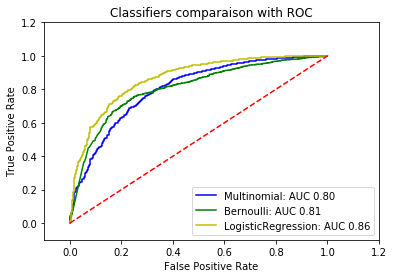

In [22]:
def formatt(x):
    if x == 'neg':
        return 0
    if x == 0:
        return 0
    return 1
vfunc = np.vectorize(formatt)

cmp = 0
colors = ['b', 'g', 'y', 'm', 'k']
for model, predicted in prediction.items():
    if model not in 'Naive':
        false_positive_rate, true_positive_rate, thresholds = roc_curve(test["senti"].map(vfunc), predicted)
        roc_auc = auc(false_positive_rate, true_positive_rate)
        plt.plot(false_positive_rate, true_positive_rate, colors[cmp], label='%s: AUC %0.2f'% (model,roc_auc))
        cmp += 1

plt.title('Classifiers comparaison with ROC')
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.2])
plt.ylim([-0.1,1.2])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [23]:
test.senti = test.senti.replace(["pos",'neg'], [True , False])

In [24]:
keys = prediction.keys()
for key in ['Multinomial', 'Bernoulli', 'LogisticRegression']:
    print(" {}:".format(key))
    print(metrics.classification_report(test["senti"], prediction.get(key)>.5, target_names = ["Positive", "Negative"]))
    print("\n")

 Multinomial:
              precision    recall  f1-score   support

    Positive       0.00      0.00      0.00       464
    Negative       0.93      1.00      0.97      6461

    accuracy                           0.93      6925
   macro avg       0.47      0.50      0.48      6925
weighted avg       0.87      0.93      0.90      6925



 Bernoulli:
              precision    recall  f1-score   support

    Positive       0.33      0.17      0.23       464
    Negative       0.94      0.97      0.96      6461

    accuracy                           0.92      6925
   macro avg       0.63      0.57      0.59      6925
weighted avg       0.90      0.92      0.91      6925



 LogisticRegression:
              precision    recall  f1-score   support

    Positive       0.55      0.33      0.41       464
    Negative       0.95      0.98      0.97      6461

    accuracy                           0.94      6925
   macro avg       0.75      0.65      0.69      6925
weighted avg       0.93

### lets test our classifiers with SAMPLE text

In [25]:
def test_sample(model, sample):
    sample_counts = count_vect.transform([sample])
    sample_tfidf = tfidf_transformer.transform(sample_counts)
    result = model.predict(sample_tfidf)[0]
    prob = model.predict_proba(sample_tfidf)[0]
    print("Sample Estimated as %s: Negative prob %f, Positive prob %f "% (result.upper(), prob[0],prob[1]))
    
test_sample(logreg, "The Product was good and easy to use")
test_sample(logreg, 'The whole experience was horrible and product is worst')
test_sample(logreg, "product is not bad ")

Sample Estimated as POS: Negative prob 0.000000, Positive prob 1.000000 
Sample Estimated as NEG: Negative prob 0.994023, Positive prob 0.005977 
Sample Estimated as POS: Negative prob 0.063539, Positive prob 0.936461 


In [26]:
check.head(10)

,reviews.rating,reviews.text,reviews.title,reviews.username,summary_clean,words,Naive,multi,Bernouli,log
0,NaN,The Kindle is my first e-ink reader. I own an ...,"Worth the money. Not perfect, but very very go...",Jeffrey Stanley,the kindle is my first e ink reader i own an i...,"[the, kindle, is, my, first, e, ink, reader, i...",neg,pos,neg,pos
1,NaN,"I'm a first-time Kindle owner, so I have nothi...","I Wanted a Dedicated E-Reader, and That's What...",Matthew Coenen,i m a first time kindle owner so i have nothin...,"[i, m, a, first, time, kindle, owner, so, i, h...",neg,pos,neg,pos
2,NaN,UPDATE NOVEMBER 2011:My review is now over a y...,Kindle vs. Nook (updated),Ron Cronovich,update november my review is now over a year o...,"[update, november, my, review, is, now, over, ...",neg,pos,neg,pos
3,NaN,"I'm a first-time Kindle owner, so I have nothi...","I Wanted a Dedicated E-Reader, and That's What...",Matthew Coenen,i m a first time kindle owner so i have nothin...,"[i, m, a, first, time, kindle, owner, so, i, h...",neg,pos,neg,pos
4,NaN,I woke up to a nice surprise this morning: a n...,"Not the perfect do-it-all device, but very clo...",C. Tipton,i woke up to a nice surprise this morning a ne...,"[i, woke, up, to, a, nice, surprise, this, mor...",neg,pos,neg,pos
5,NaN,The Kindle is my first e-ink reader. I own an ...,"Worth the money. Not perfect, but very very go...",Jeffrey Stanley,the kindle is my first e ink reader i own an i...,"[the, kindle, is, my, first, e, ink, reader, i...",neg,pos,neg,pos
6,NaN,UPDATE NOVEMBER 2011:br /br /My review is now ...,Kindle vs. Nook (updated),Ron Cronovich,update november br br my review is now over a ...,"[update, november, br, br, my, review, is, now...",neg,pos,neg,pos
7,NaN,I woke up to a nice surprise this morning: a n...,"Not the perfect do-it-all device, but very clo...",C. Tipton,i woke up to a nice surprise this morning a ne...,"[i, woke, up, to, a, nice, surprise, this, mor...",neg,pos,neg,pos
8,NaN,I use to hate to read but now that I have my K...,Great,D. Tatro,i use to hate to read but now that i have my k...,"[i, use, to, hate, to, read, but, now, that, i...",pos,pos,pos,pos
9,NaN,All of them quit working. There's absolutely n...,I've had 3!,M. Lansford Kindle fave,all of them quit working there s absolutely no...,"[all, of, them, quit, working, there, s, absol...",neg,pos,pos,pos


## Wordcloud for this text

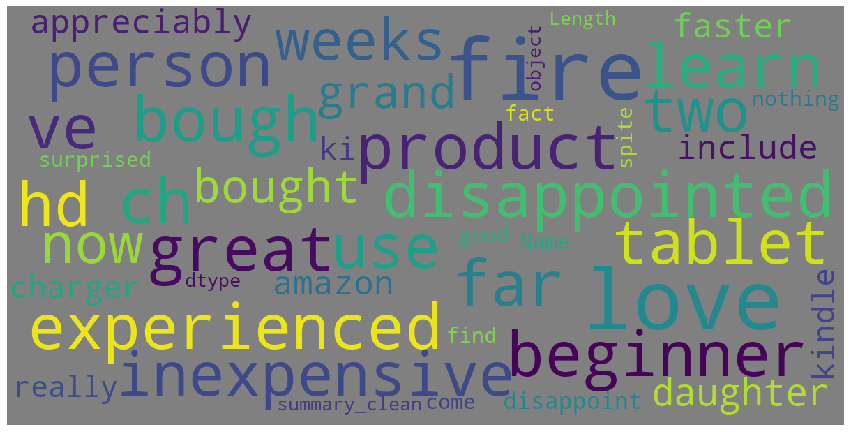

In [27]:
from wordcloud import WordCloud, STOPWORDS
stopwords = set(STOPWORDS)


mpl.rcParams['font.size']=12                #10 
mpl.rcParams['savefig.dpi']=100             #72 
mpl.rcParams['figure.subplot.bottom']=.1 


def show_wordcloud(data, title = None):
    wordcloud = WordCloud(
        background_color='gray',
        stopwords=stopwords,
        max_words=300,
        max_font_size=40, 
        scale=3,
        random_state=1 # chosen at random by flipping a coin; it was heads
        
    ).generate(str(data))
    
    fig = plt.figure(1, figsize=(15, 15))
    plt.axis('off')
    if title: 
        fig.suptitle(title, fontsize=20)
        fig.subplots_adjust(top=2.3)

    plt.imshow(wordcloud)
    plt.show()
    
show_wordcloud(senti["summary_clean"])

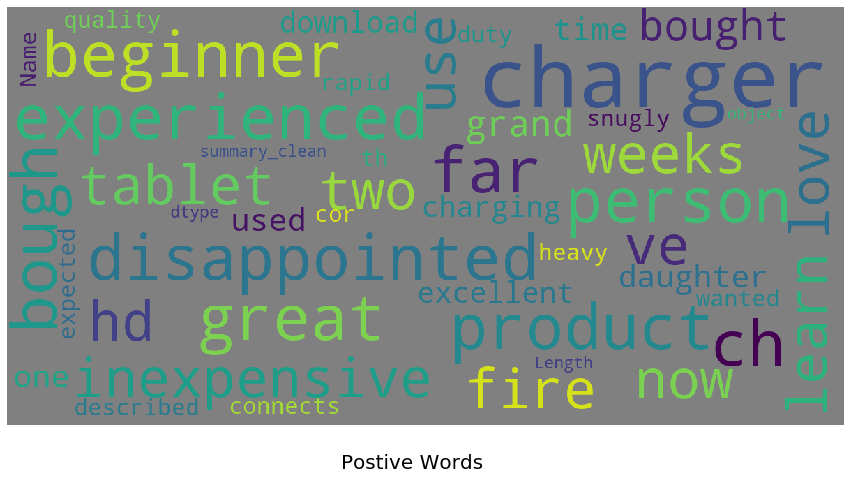

In [28]:
show_wordcloud(senti["summary_clean"][senti.senti == "pos"] , title="Postive Words")

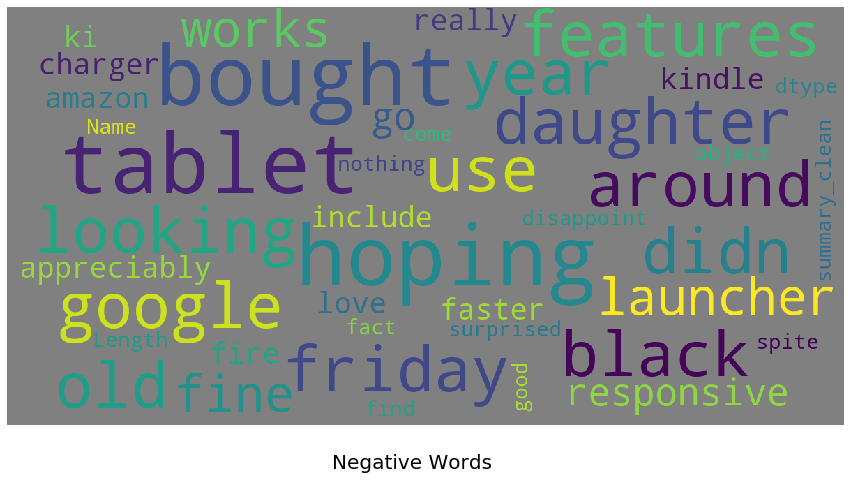

In [29]:
show_wordcloud(senti["summary_clean"][senti.senti == "neg"] , title="Negative Words")

#### Pie plot

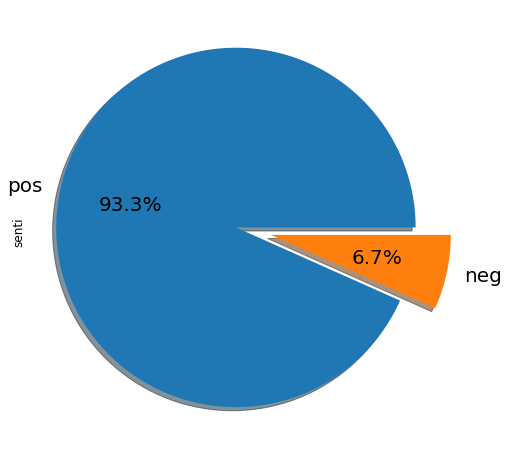

In [47]:
senti['senti'].value_counts().plot.pie(explode = [0.1,0.1],autopct = '%1.1f%%',shadow = True,figsize=(10,8),fontsize=20)
plt.show()

# Statistical Summary of the data

Text(0.5, 1.0, 'General Statistics of Products Dataset')

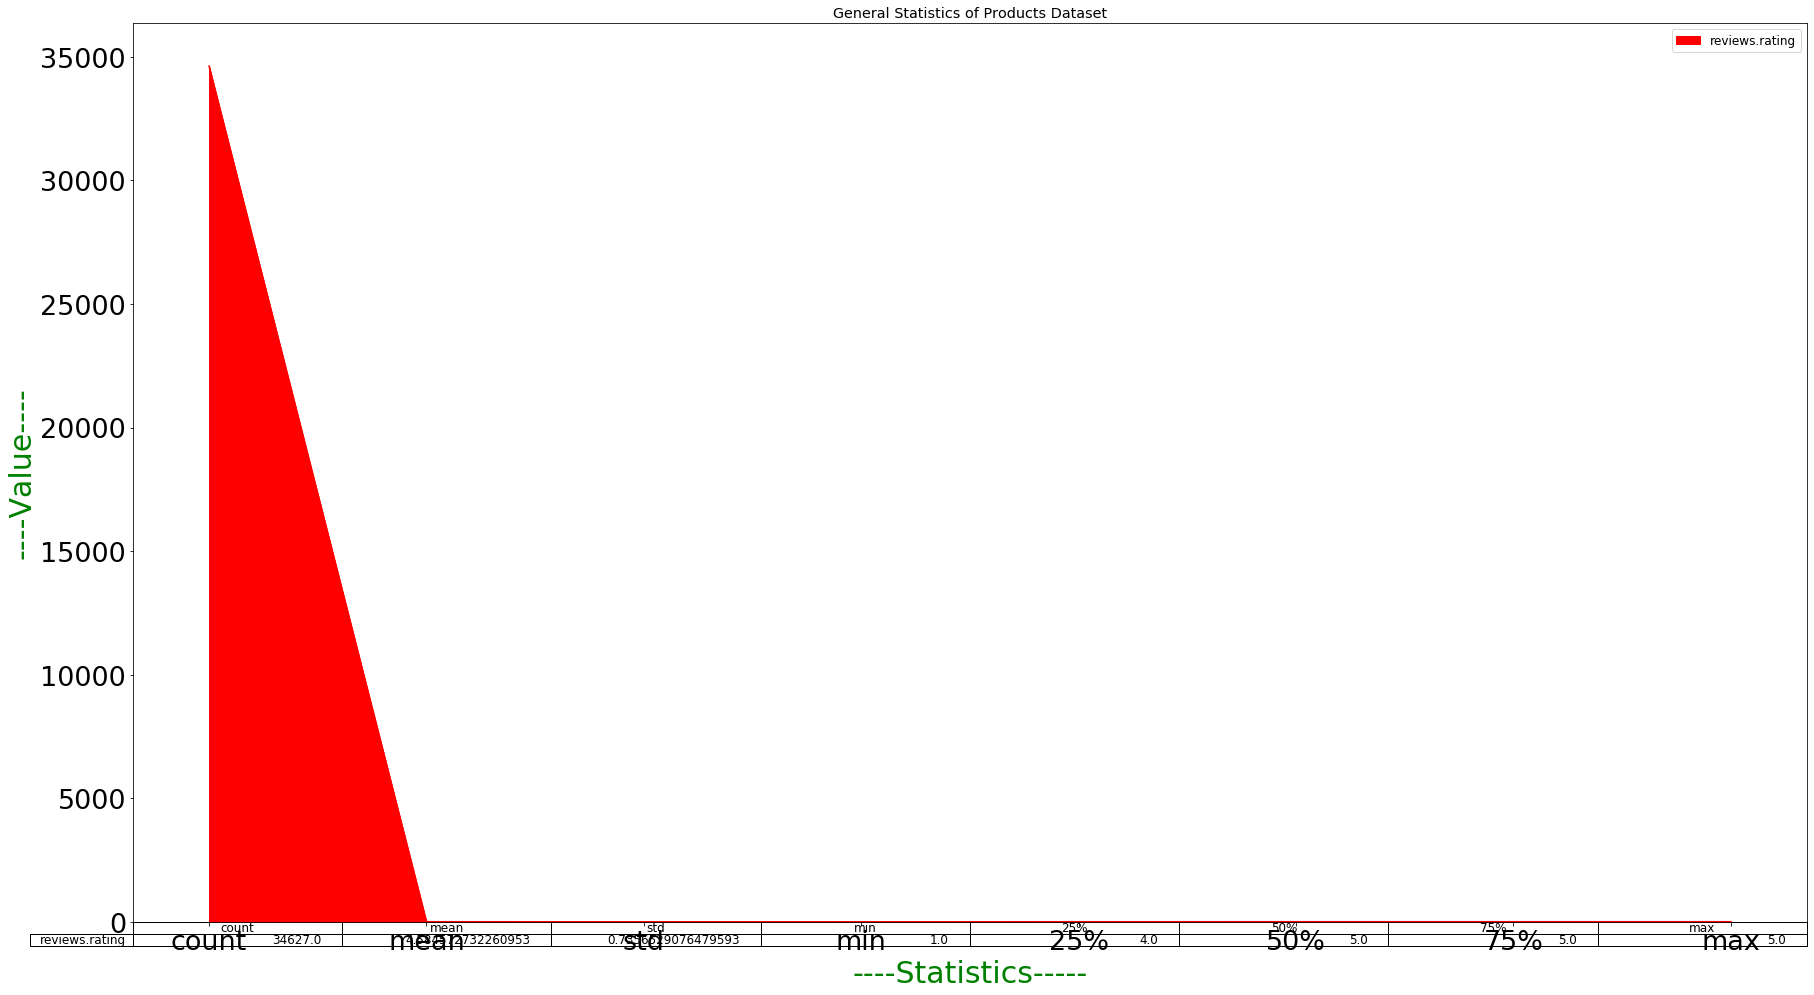

In [48]:
senti.describe().plot(kind = 'area',fontsize = 27,figsize = (30,16),table = True,colormap = 'autumn')
plt.xlabel('----Statistics-----',fontsize = 30,color = 'green')
plt.ylabel('----Value----',fontsize = 30,color = 'green')
plt.title('General Statistics of Products Dataset')